In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.filters import threshold_otsu
from skimage.color import label2rgb



In [17]:

TRAIN_PATH = '/kaggle/input/datasets/lucifer86/stage1-train/'

folders = os.listdir(TRAIN_PATH)
img_path = os.path.join(TRAIN_PATH,
                        folders[0],
                        "images",
                        folders[0] + ".png")

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


blur = cv2.GaussianBlur(gray,(5,5),0)

# threshold
thresh_val = threshold_otsu(blur)
binary = blur > thresh_val


distance = ndi.distance_transform_edt(binary)


labels_no_marker = watershed(-distance, mask=binary)

coords = peak_local_max(distance,
                        footprint=np.ones((25,25)),
                        labels=binary)

marker_mask = np.zeros(distance.shape, dtype=bool)
marker_mask[tuple(coords.T)] = True

markers, _ = ndi.label(marker_mask)

labels_marker = watershed(-distance,
                          markers,
                          mask=binary)


plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

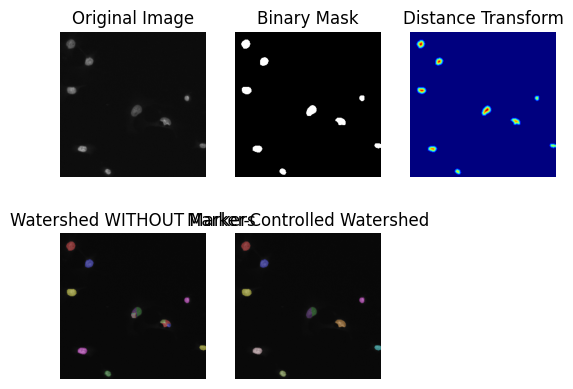

In [19]:

plt.subplot(231)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(232)
plt.title("Binary Mask")
plt.imshow(binary,cmap='gray')
plt.axis('off')

plt.subplot(233)
plt.title("Distance Transform")
plt.imshow(distance,cmap='jet')
plt.axis('off')

plt.subplot(234)
plt.title("Watershed WITHOUT Markers")
plt.imshow(label2rgb(labels_no_marker,
                     image=img_rgb,
                     bg_label=0))
plt.axis('off')

plt.subplot(235)
plt.title("Marker-Controlled Watershed")
plt.imshow(label2rgb(labels_marker,
                     image=img_rgb,
                     bg_label=0))
plt.axis('off')

plt.show()